In [57]:
from string import ascii_letters
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np


from IPython.display import Image, display, Markdown, Latex

%matplotlib inline
sns.set_theme(style="white")
sns.set()

# Overview of seaborn plotting functions

In [11]:
penguins = sns.load_dataset("penguins")

In [13]:
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


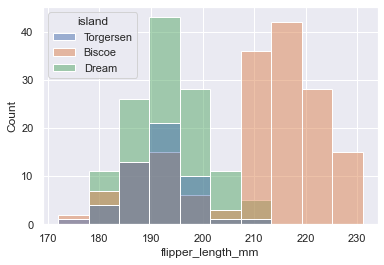

In [14]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="island");

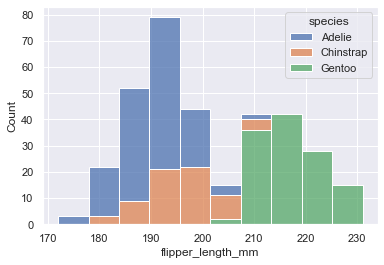

In [9]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

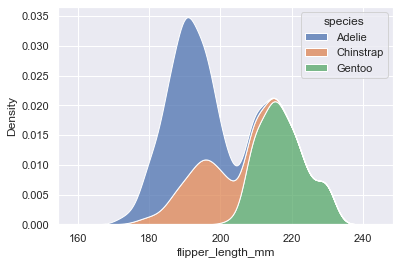

In [8]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

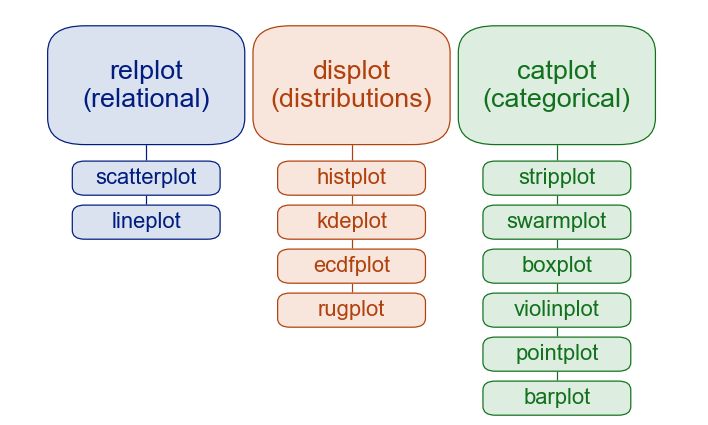

In [21]:
Image(filename="Seaborn.png")

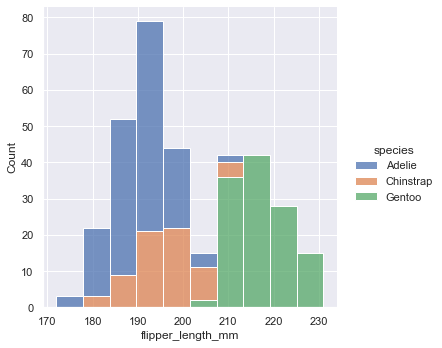

In [23]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

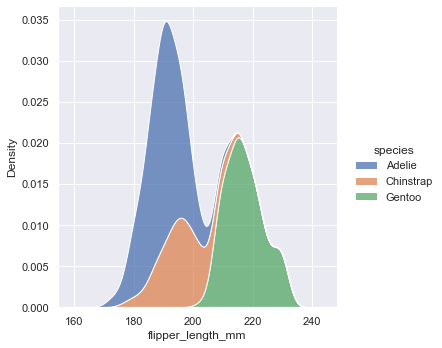

In [25]:
#using the kind parameter here
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde");

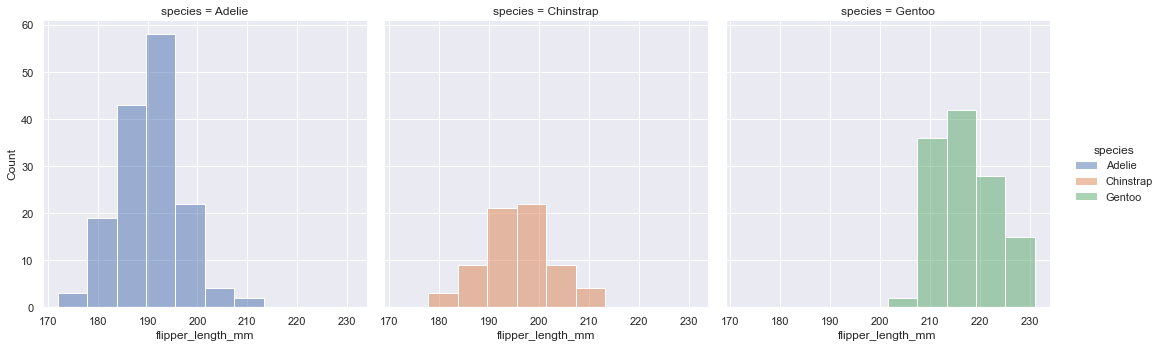

In [29]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species");

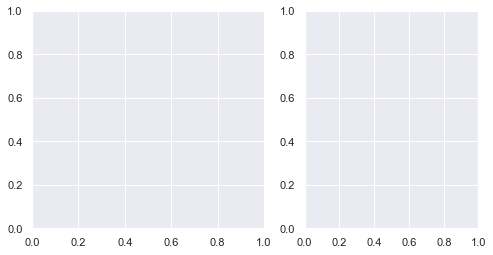

In [30]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))

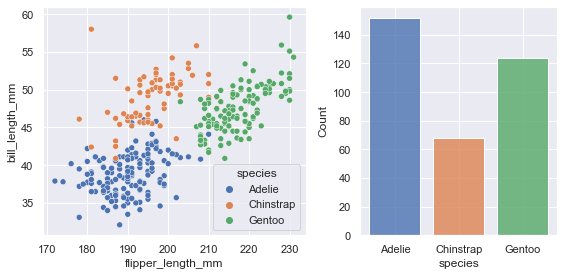

In [31]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

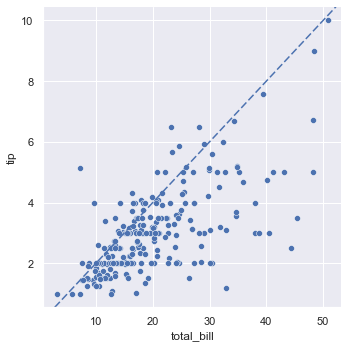

In [38]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2));

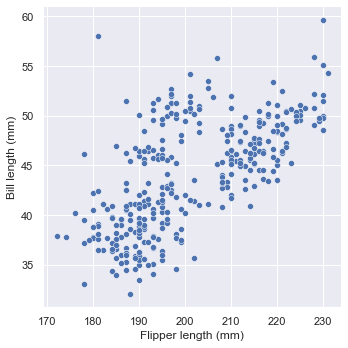

In [ ]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)");

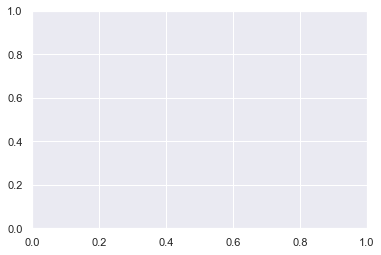

In [45]:
f, ax = plt.subplots()

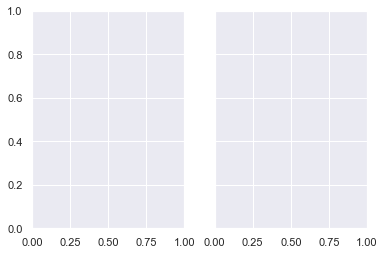

In [46]:
f, ax = plt.subplots(1, 2, sharey=True)

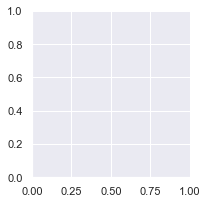

In [47]:
g = sns.FacetGrid(penguins)

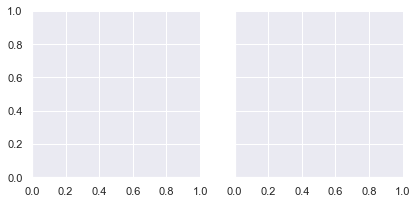

In [48]:
g = sns.FacetGrid(penguins, col="sex")

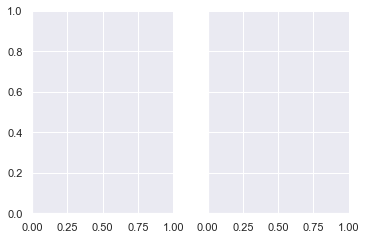

In [49]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

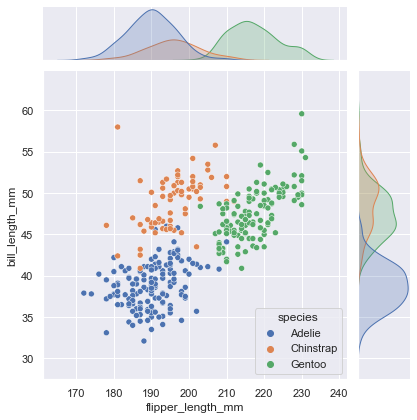

In [51]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");


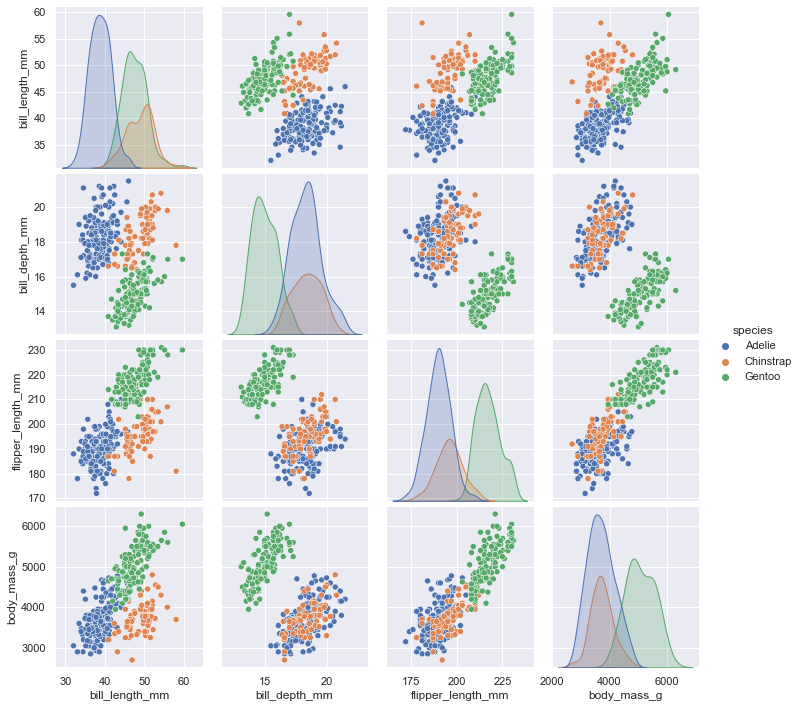

In [52]:
sns.pairplot(data=penguins, hue="species");

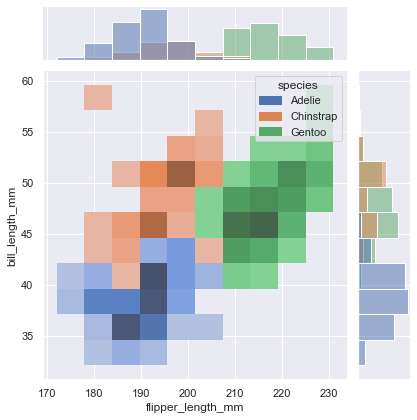

In [54]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist");

# Data structures accepted by seaborn

In [71]:
flights = sns.load_dataset("flights")
flights.head(6)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135


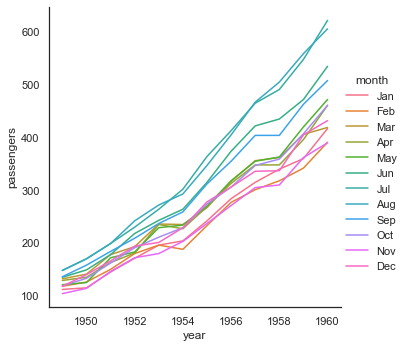

In [76]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line");

In [73]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


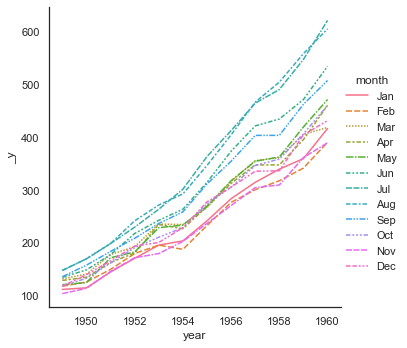

In [77]:
sns.relplot(data=flights_wide,  kind="line");

#Seaborn treats the argument to data as wide form when neither x nor y are assigned.

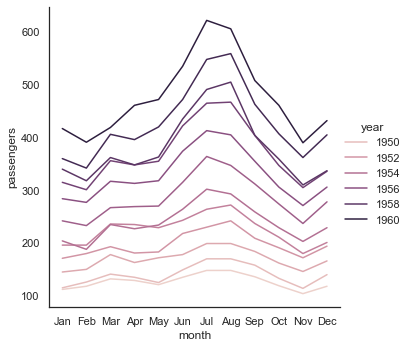

In [79]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line");

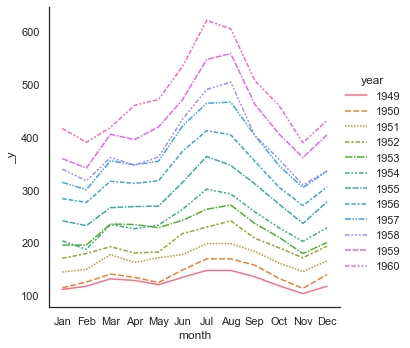

In [84]:
sns.relplot(data=flights_wide.T , kind="line"); #same as wide.transpose()

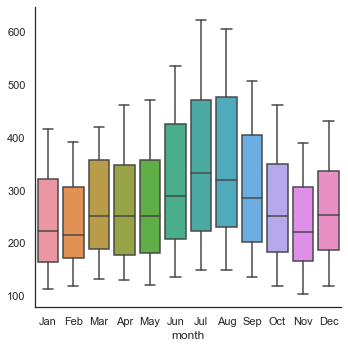

In [86]:
sns.catplot(data=flights_wide, kind="box");

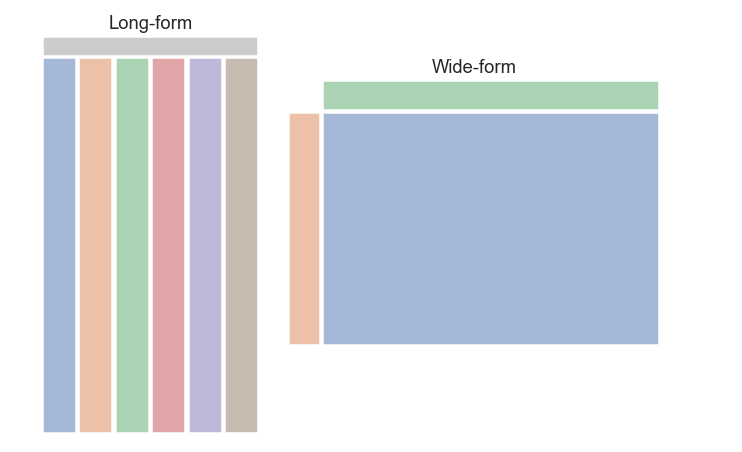

In [87]:
Image(filename="longvswide.png")

In [88]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


In [89]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


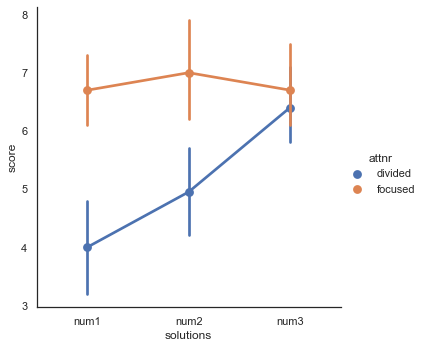

In [91]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point");

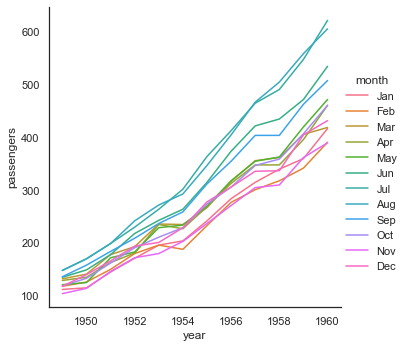

In [92]:
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

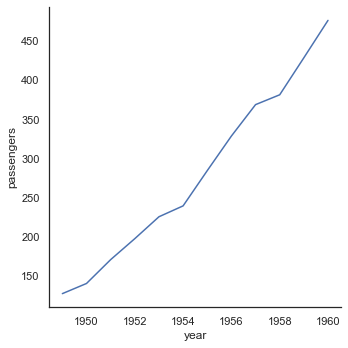

In [96]:
flights_avg = flights.groupby("year").mean()
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line");

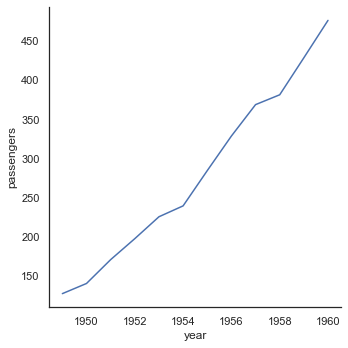

In [98]:
year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line");

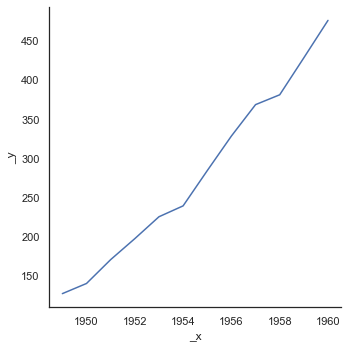

In [100]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line");

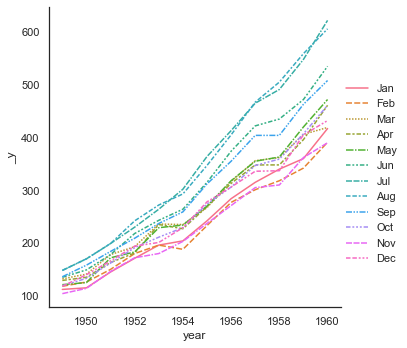

In [102]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line");

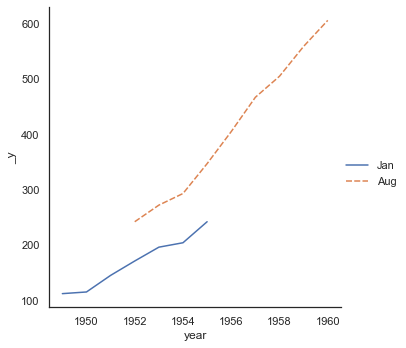

In [103]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line");

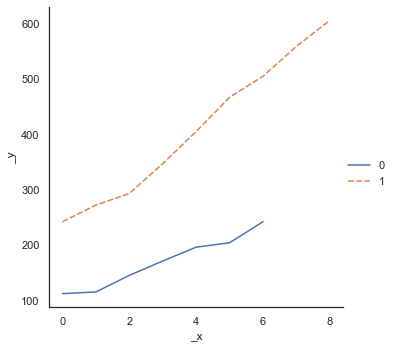

In [104]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line");

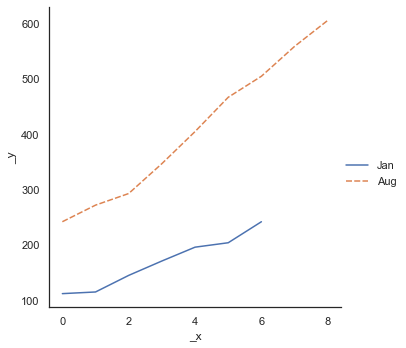

In [106]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line");

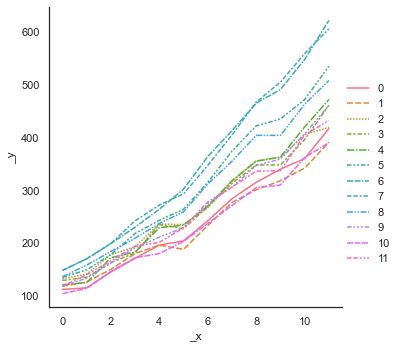

In [107]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line");

# Plotting a diagonal correlation matrix

In [60]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))



In [61]:
d.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258


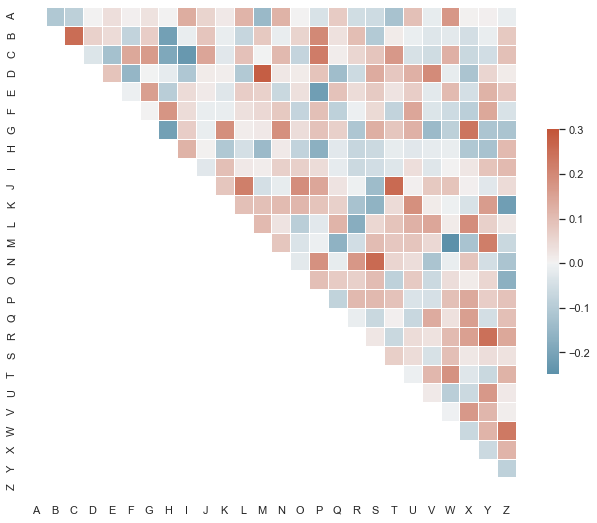

In [67]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the lower triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


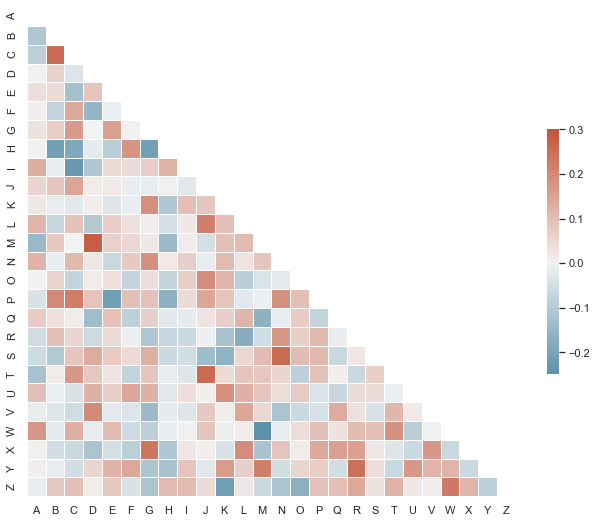

In [68]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


# Annotated heatmaps

In [108]:
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


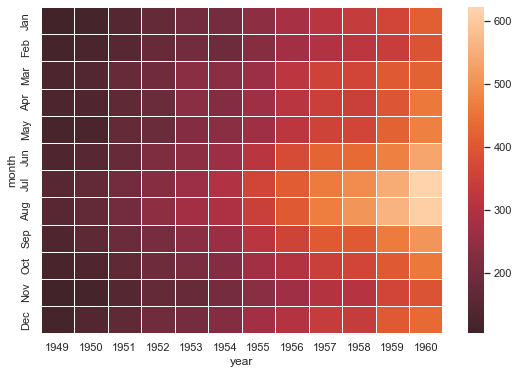

In [119]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, linewidths=.5, ax=ax, center=0);

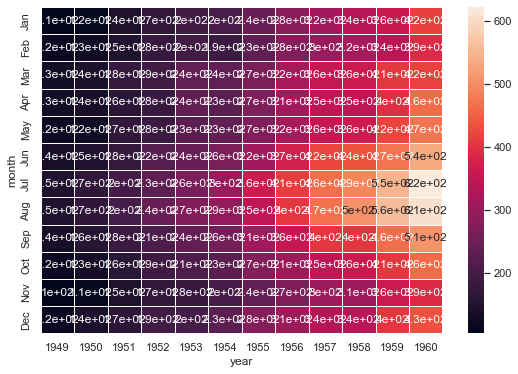

In [121]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True,  linewidths=.5, ax=ax);

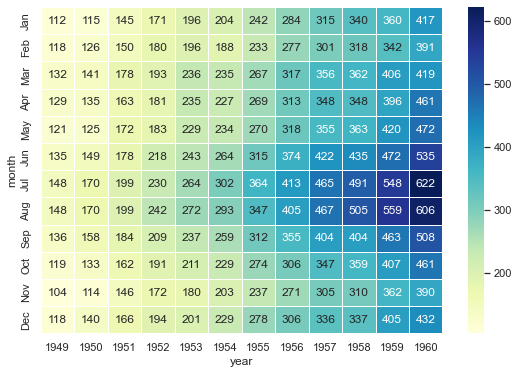

In [127]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d",  linewidths=.5, ax=ax, cmap="YlGnBu");